In [48]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



In [3]:
import tf_keras
IMAGE_SHAPE = (224, 224)

classifier = tf_keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])



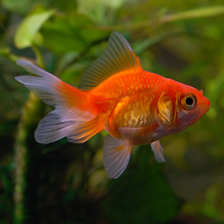

In [4]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish = np.array(gold_fish)/255.0

gold_fish.shape

(224, 224, 3)

In [6]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [7]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 249ms/step


(1, 1001)

In [8]:
predicted_label_index = np.argmax(result)

predicted_label_index = int(predicted_label_index)
predicted_label_index

2

In [9]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
    
image_labels[:5]
    

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [10]:
image_labels[predicted_label_index]

'goldfish'

In [11]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [12]:
data_dir

'./datasets/flower_photos'

In [13]:
import pathlib

data_dir = "datasets/flower_photos/flower_photos"
data_dir = pathlib.Path(data_dir)

data_dir

PosixPath('datasets/flower_photos/flower_photos')

In [14]:
list(data_dir.glob("*/*.jpg"))[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

In [15]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [16]:
roses = list(data_dir.glob("roses/*"))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

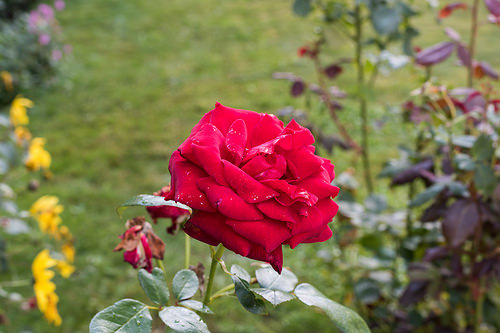

In [17]:
Image.open(str(roses[3]))

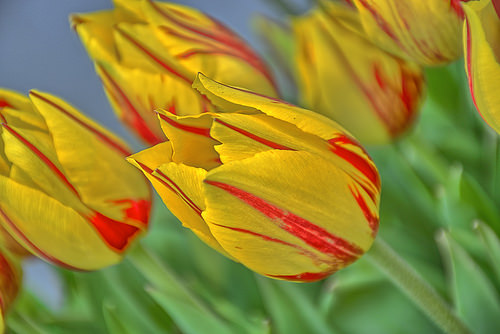

In [18]:
tulips= list(data_dir.glob("tulips/*"))
Image.open(str(tulips[3]))

In [19]:
flowers_image_dict = {
    "roses" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")),
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "sunflower" : list(data_dir.glob("sunflower/*")),
    "tulips" : list(data_dir.glob("tulips/*")),
}

In [20]:
flowers_image_dict["roses"]

[PosixPath('datasets/flower_photos/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4608

In [21]:
flowers_labels_dict = {
    "roses" : 0,
    "daisy" : 1,
    "dandelion" : 2,
    "sunflower" : 3,
    "tulips" : 4,
}

In [22]:
str(flowers_image_dict["roses"][0])

'datasets/flower_photos/flower_photos/roses/16209331331_343c899d38.jpg'

In [23]:
img = cv2.imread(str(flowers_image_dict["roses"][1]))
img.shape

(333, 500, 3)

In [24]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [25]:
X, y = [], []

for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img = cv2.resize(img, IMAGE_SHAPE)
        X.append(resize_img)
        y.append(flowers_labels_dict[flower_name])

In [26]:
X = np.array(X)
y = np.array(y)

In [27]:
import sklearn

In [28]:
import numpy as np
print(np.__version__)

1.24.3


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)



In [32]:
X_train_scaled = X_train /255
X_test_scaled = X_test / 255

In [33]:
X_train_scaled[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.68627451, 0.68627451, 0.68627451],
        [0.6627451 , 0.6627451 , 0.6627451 ],
        [0.6627451 , 0.6627451 , 0.6627451 ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.63137255, 0.63137255, 0.63137255],
        [0.70588235, 0.70588235, 0.70588235],
        [0.52941176, 0.52941176, 0.52941176]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.71372549, 0.71372549, 0.71372549],
        [0.58431373, 0.58431373, 0.58431373],
        [0.52941176, 0.52941176, 0.52941176]],

       ...,

       [[0.01568627, 0.01568627, 0.01568627],
        [0.01568627, 0.01568627, 0.01568627],
        [0.01568627, 0

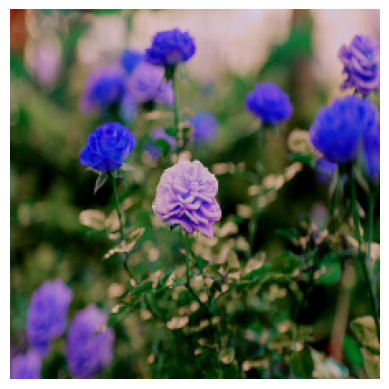

In [43]:
plt.axis("off")
plt.imshow(X[1])

In [40]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(predicted, axis =1)
predicted

1/1 [==============================] - 0s 35ms/step


array([795, 795, 722])

In [44]:
image_labels[722]

'pillow'

In [51]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape = (224,224,3), trainable = False)

In [52]:
num_of_flowers = 5

model = tf_keras.Sequential([
    pretrained_model_without_top_layer,
    tf_keras.layers.Dense(num_of_flowers)
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [53]:
model.compile(
    optimizer = "adam",
    loss = tf_keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ["accuracy"]
)
model.fit(X_train_scaled, y_train, epochs = 5)

Epoch 1/5
70/70 [==============================] - 10s 119ms/step - loss: 0.6960 - accuracy: 0.7303
Epoch 2/5
70/70 [==============================] - 8s 118ms/step - loss: 0.3309 - accuracy: 0.8873
Epoch 3/5
70/70 [==============================] - 9s 123ms/step - loss: 0.2558 - accuracy: 0.9143
Epoch 4/5
70/70 [==============================] - 9s 124ms/step - loss: 0.2160 - accuracy: 0.9345
Epoch 5/5
70/70 [==============================] - 9s 125ms/step - loss: 0.1896 - accuracy: 0.9443
